In [1]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

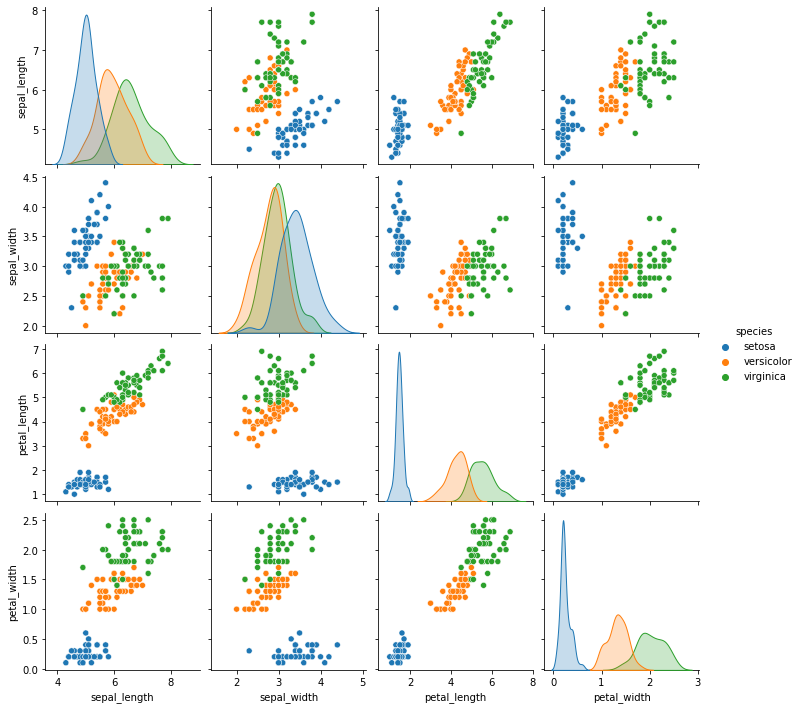

In [6]:
sns.pairplot(df,hue="species");

In [7]:
model = KMeans(n_clusters=3, random_state=170)
iris = df.drop(['species'],axis=1)
clusters = model.fit_predict(iris)
df['clusters'] = clusters

In [8]:
df.groupby("clusters").mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


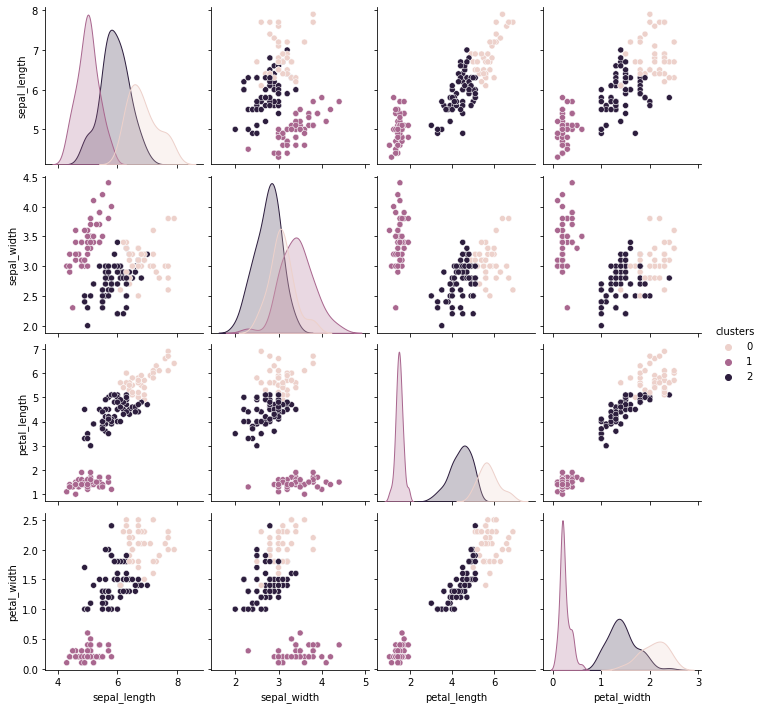

In [9]:
sns.pairplot(df,hue="clusters",vars=list(df.columns)[:-2])

In [10]:
pd.crosstab(df.species,df.clusters)

clusters,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


In [11]:
iris[df.species == 'setosa'].mean(axis=0)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

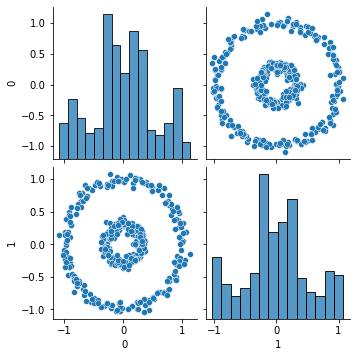

In [12]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3, noise=.05,random_state=42)
circle = pd.DataFrame(X)
sns.pairplot(circle)

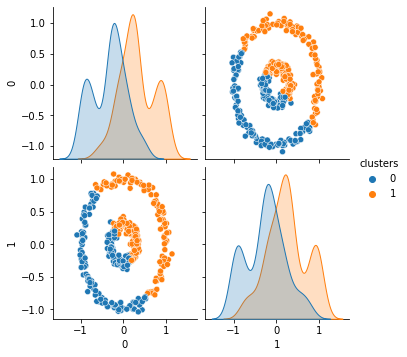

In [13]:
clusters = KMeans(n_clusters=2, random_state=170).fit_predict(circle)
circle["clusters"] = clusters
sns.pairplot(circle,hue="clusters",vars=list(circle.columns)[:-1])